<a href="https://colab.research.google.com/github/Tanvi-Chaudhari/ML-Prediction-of-Employee-Turnover/blob/main/ML_Prediction_of_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Prediction of Employee Turnover

Description: ML project of predicting employee turnover. Meaning whether an employee's going to leave the company or stay using different parameters.


Instructions and Key Points:

1. Importing libraries and dataset
2. Data Preprocessing
3. Creating Variables for Categorical Variables
4. Modeling with Logistic Regression and Random Forest
5. Logistic Regression Accuracy: 77.1%
6. Random Forest Accuracy: 97.9%

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
URL = 'https://drive.google.com/file/d/1Bh4byje8ZaXh87XyEApfOZlUTfmtVj-2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

In [ ]:
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_house,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
0,0.05,0.32,3,149,1,0,1,0,Training,75000
1,0.90,0.05,9,265,4,0,1,1,Engineering,75000
2,0.31,0.92,1,227,0,0,1,0,Research and Development,100000
3,0.80,0.82,4,237,2,0,1,0,Training,75000
4,0.27,0.50,1,288,1,0,1,0,Marketing,50000


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_house,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
995,0.56,0.08,3,156,4,0,1,0,Marketing,50000
996,0.14,0.14,1,233,4,0,1,0,Support,100000
997,0.48,0.36,3,118,5,0,1,0,Services,100000
998,0.44,0.66,10,113,5,0,1,0,Research and Development,50000
999,0.71,0.92,3,238,3,0,1,0,Product Management,100000


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_house', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

In [ ]:
df.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_house     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

In [ ]:
df.duplicated(keep="first").sum() #For checking duplicates in our data set.

0

In [ ]:
df.drop_duplicates(inplace=True) # For dropping the duplicates.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      1000 non-null   float64
 1   last_evaluation         1000 non-null   float64
 2   number_project          1000 non-null   int64  
 3   average_monthly_house   1000 non-null   int64  
 4   time_spent_company      1000 non-null   int64  
 5   work_accident           1000 non-null   int64  
 6   left                    1000 non-null   int64  
 7   promotion_last_5_years  1000 non-null   int64  
 8   department              1000 non-null   object 
 9   salary                  1000 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 78.2+ KB


# Exploratory Data Analysis

### Monthly Hours

In [ ]:
df["average_monthly_house"].unique()   # It's actually hours, not house. Lol!

array([149, 265, 227, 237, 288, 299, 126, 271, 246, 253, 104, 156, 134,
       208, 282, 129, 141, 127, 269, 101, 164, 199, 135, 162, 152, 182,
       276, 266, 241, 195, 157, 252, 260, 297, 147, 155, 294, 258, 117,
       128, 214, 287, 198, 209, 106, 167, 291, 279, 273, 261, 118, 218,
       111, 165, 215, 139, 256, 119, 151, 210, 194, 262, 148, 131, 105,
       217, 109, 200, 205, 243, 113, 283, 121, 213, 298, 173, 153, 206,
       229, 251, 138, 204, 255, 254, 222, 177, 203, 211, 161, 272, 193,
       242, 180, 197, 280, 234, 120, 236, 250, 160, 275, 192, 268, 244,
       170, 216, 103, 112, 116, 201, 115, 296, 226, 228, 225, 274, 185,
       248, 100, 178, 181, 240, 239, 171, 145, 285, 249, 300, 107, 191,
       263, 137, 224, 150, 133, 284, 202, 286, 223, 187, 163, 123, 270,
       146, 143, 132, 278, 110, 188, 166, 140, 174, 264, 172, 247, 277,
       257, 189, 184, 267, 196, 293, 125, 169, 124, 219, 245, 102, 154,
       130, 190, 159, 212, 144, 289, 295, 136, 235, 220, 158, 29

In [ ]:
bin = len(df['average_monthly_house'].unique())
bin

199

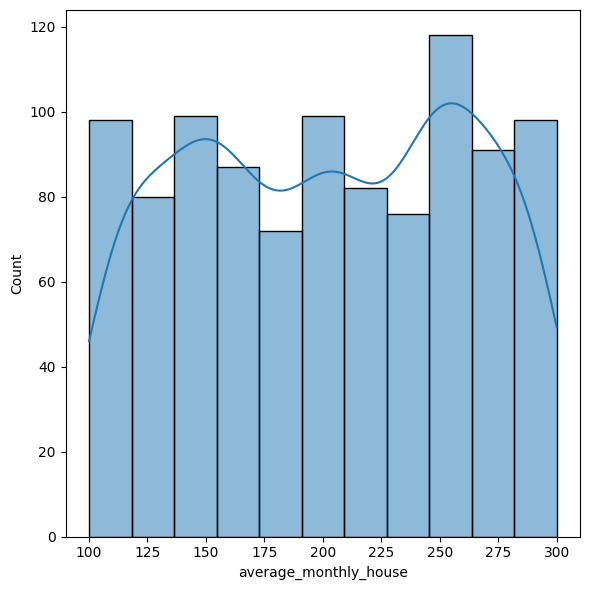

In [ ]:
# Plotting a histogram

plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_monthly_house"], kde=True)    #KDE (Kernel Density Estimate) =>
plt.tight_layout()
plt.show()


### Number of Projects

In [ ]:
df["number_project"].value_counts()

number_project
6     109
10    105
0     101
4      98
1      95
3      90
5      88
2      86
7      82
9      74
8      72
Name: count, dtype: int64

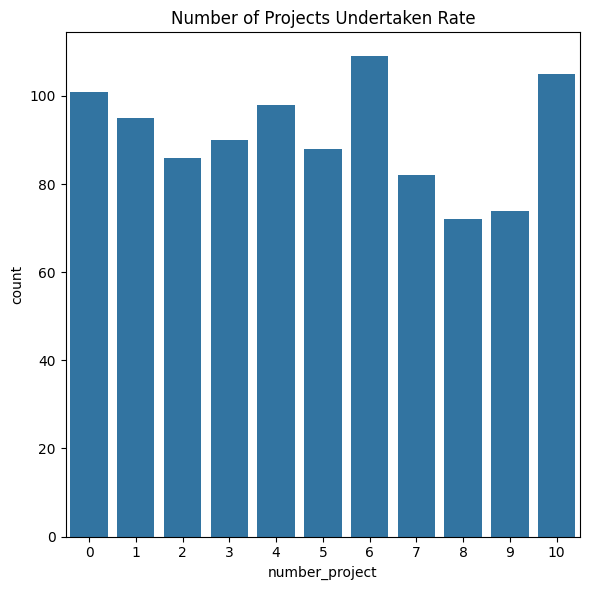

In [ ]:
# Plotting a count plot

plt.figure(figsize=(6, 6))
sns.countplot(data = df, x = "number_project")
plt.title("Number of Projects Undertaken Rate")
plt.tight_layout()
plt.show()


In [ ]:
### Promotion Made in the Last Five Years

In [ ]:
df["promotion_last_5_years"].value_counts()

promotion_last_5_years
0    997
1      3
Name: count, dtype: int64

In [ ]:
labels = df["promotion_last_5_years"] .value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Not Promoted" if i == 0 else "Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

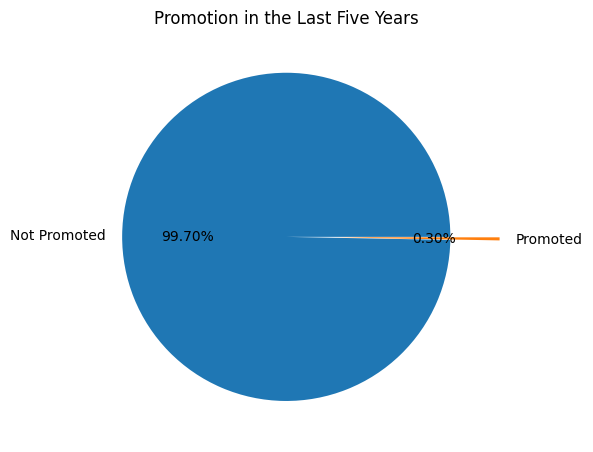

In [ ]:
plt.figure(figsize = (6, 6))
plt.pie(x = df["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion in the Last Five Years")
plt.tight_layout()
plt.show()

### Work Accidents

In [ ]:
df["work_accident"].value_counts()

work_accident
0    998
1      2
Name: count, dtype: int64

In [ ]:
labels = df["work_accident"] .value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

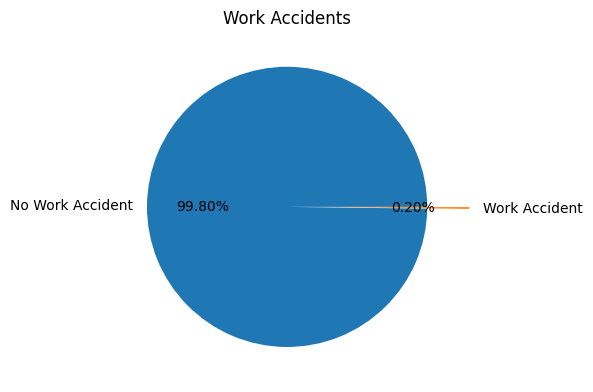

In [ ]:
plt.figure(figsize = (6, 6))
plt.pie(x = df["work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Work Accidents")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spent_company"].value_counts()

time_spent_company
4    183
0    181
1    177
5    171
2    150
3    138
Name: count, dtype: int64

In [ ]:
labels = df["time_spent_company"] .value_counts().index.tolist()
labels

[4, 0, 1, 5, 2, 3]

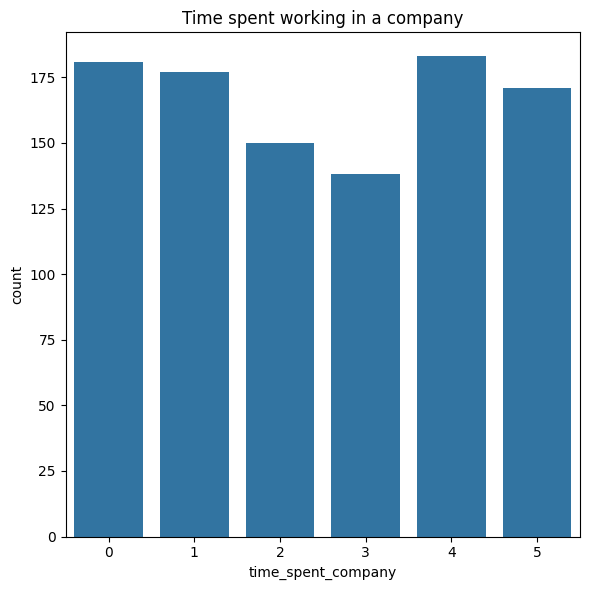

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= "time_spent_company", data=df)
plt.title("Time spent working in a company")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spent_company"].mean() # The employee work around 2.4 years before turnover.

2.478

###Department Comparison

In [ ]:
df["department"].unique()

array(['Training', 'Engineering', 'Research and Development', 'Marketing',
       'Sales', 'Support', 'Human Resources', 'Product Management',
       'Accounting', 'Legal', 'Business Development', 'Services'],
      dtype=object)

In [ ]:
df["department"].value_counts()

department
Research and Development    91
Support                     91
Sales                       90
Business Development        89
Marketing                   86
Engineering                 85
Legal                       85
Accounting                  83
Training                    78
Services                    75
Product Management          74
Human Resources             73
Name: count, dtype: int64

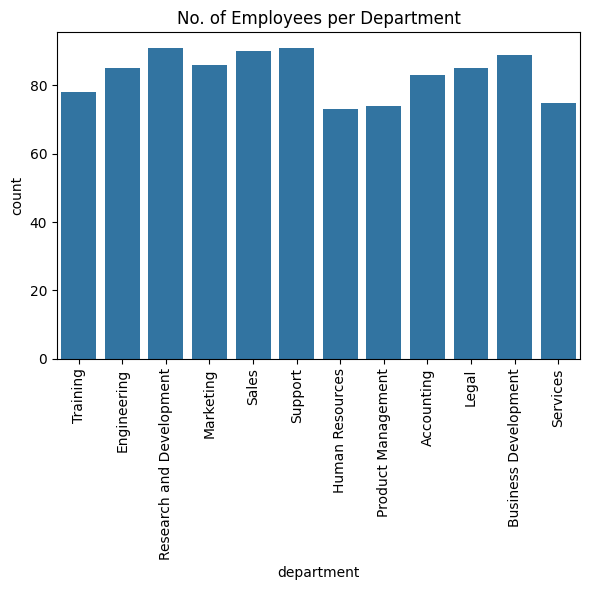

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= "department", data=df)
plt.title("No. of Employees per Department")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
df["salary"].unique()

array([ 75000, 100000,  50000])

In [ ]:
df["salary"].value_counts()

salary
50000     350
75000     332
100000    318
Name: count, dtype: int64

In [ ]:
labels = df["salary"] .value_counts().index.tolist()
labels

[50000, 75000, 100000]

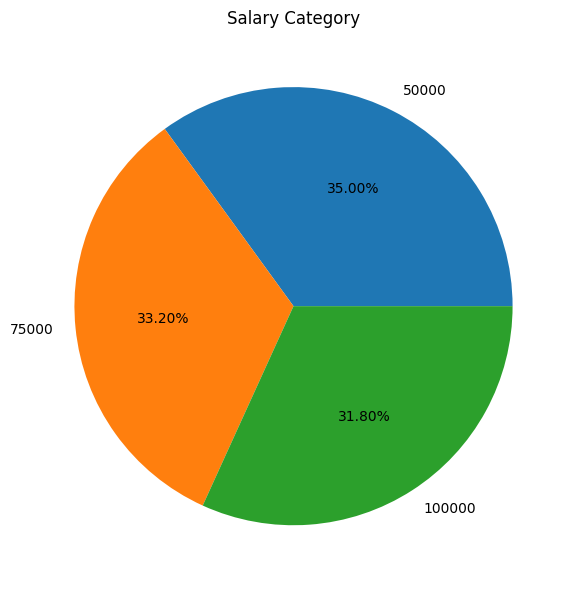

In [ ]:
plt.figure(figsize = (6, 6))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data Pre-Processing

In [ ]:
df.rename(columns={"salary":"salary_level"}, inplace=True) # Renaming columns

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_house', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary_level'],
      dtype='object')

### Categorical Encoding

In [ ]:
# Assuming df is your DataFrame and categorical_cols is your list of categorical columns
categorical_cols = ["department", "salary_level"]

# Encoding categorical columns
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cate")

# As if just printing encoded_cols, salary col is present too.
# Converting True/False values to 0/1
encoded_cols = encoded_cols.astype(int)

# Remove the "salary_level" column
encoded_cols = encoded_cols.drop("salary_level", axis=1)

In [ ]:
encoded_cols

,cate_Accounting,cate_Business Development,cate_Engineering,cate_Human Resources,cate_Legal,cate_Marketing,cate_Product Management,cate_Research and Development,cate_Sales,cate_Services,cate_Support,cate_Training
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0
997,0,0,0,0,0,0,0,0,0,1,0,0
998,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Join the encoded columns with a specified suffix
df = df.join(encoded_cols, rsuffix='_encoded')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_house,time_spent_company,work_accident,left,promotion_last_5_years,department,salary_level,...,cate_Engineering,cate_Human Resources,cate_Legal,cate_Marketing,cate_Product Management,cate_Research and Development,cate_Sales,cate_Services,cate_Support,cate_Training
0,0.05,0.32,3,149,1,0,1,0,Training,75000,...,0,0,0,0,0,0,0,0,0,1
1,0.90,0.05,9,265,4,0,1,1,Engineering,75000,...,1,0,0,0,0,0,0,0,0,0
2,0.31,0.92,1,227,0,0,1,0,Research and Development,100000,...,0,0,0,0,0,1,0,0,0,0
3,0.80,0.82,4,237,2,0,1,0,Training,75000,...,0,0,0,0,0,0,0,0,0,1
4,0.27,0.50,1,288,1,0,1,0,Marketing,50000,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.drop(["department", "salary_level"], inplace=True, axis = "columns")

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_house', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'cate_Accounting',
       'cate_Business Development', 'cate_Engineering', 'cate_Human Resources',
       'cate_Legal', 'cate_Marketing', 'cate_Product Management',
       'cate_Research and Development', 'cate_Sales', 'cate_Services',
       'cate_Support', 'cate_Training'],
      dtype='object')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_house,time_spent_company,work_accident,left,promotion_last_5_years,cate_Accounting,cate_Business Development,cate_Engineering,cate_Human Resources,cate_Legal,cate_Marketing,cate_Product Management,cate_Research and Development,cate_Sales,cate_Services,cate_Support,cate_Training
0,0.05,0.32,3,149,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.90,0.05,9,265,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.31,0.92,1,227,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.80,0.82,4,237,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.27,0.50,1,288,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Min Max Scaling

In [ ]:
df["average_monthly_house"].min()

100

In [ ]:
df["average_monthly_house"].max()

300

Split Data into Train and Test

In [ ]:
X = df.drop("left", axis=1)
y=df["left"]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_house,time_spent_company,work_accident,promotion_last_5_years,cate_Accounting,cate_Business Development,cate_Engineering,cate_Human Resources,cate_Legal,cate_Marketing,cate_Product Management,cate_Research and Development,cate_Sales,cate_Services,cate_Support,cate_Training
0,0.05,0.32,3,149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.90,0.05,9,265,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.31,0.92,1,227,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.80,0.82,4,237,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.27,0.50,1,288,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # train_size is 80% => 80% of the data for trianing and 20% for testing.

In [ ]:
X_train.shape

(800, 19)

In [ ]:
X_test.shape

(200, 19)

## Train Model

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# logReg is LR training model instance.
#Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome.
#max_iter => This parameter specifies the maximum number of iterations for the solver to converge.
logReg = LogisticRegression(max_iter=2000)

In [ ]:
# During the training process, the model learns the patterns and relationships between the features (X_train) and the target variable (y_train).
# This command learns from the provided training data to make predictions on new data.
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
logReg_predictions = logReg.predict(X_test)

In [ ]:
accuracy_score(y_test, logReg_predictions)

1.0

In [ ]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, logReg_predictions)
cm

array([[200]])

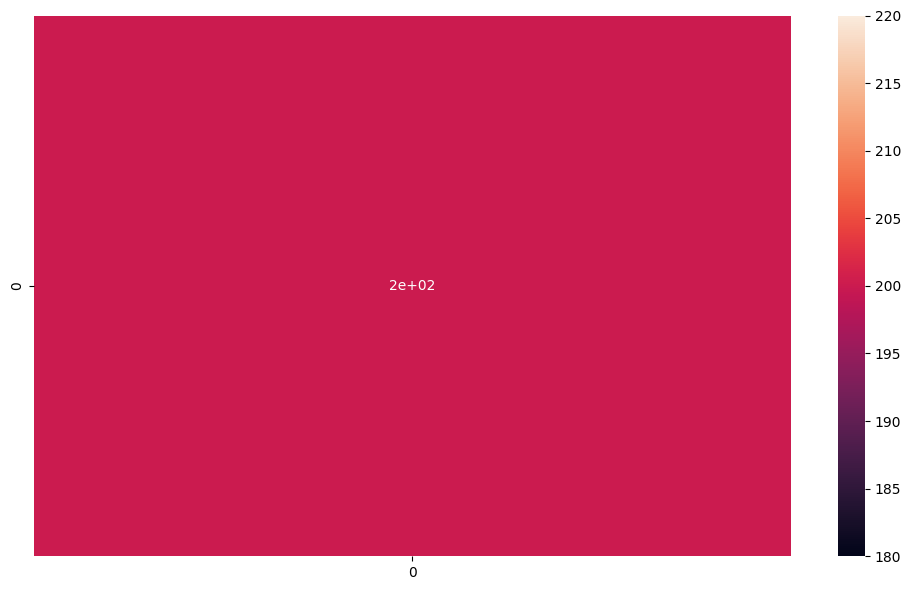

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranForest = RandomForestClassifier(n_estimators=100)

In [ ]:
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
ranForest_predictions = ranForest.predict(X_test)

In [ ]:
accuracy_score(y_test, ranForest_predictions)

1.0

In [ ]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, logReg_predictions)
cm

array([[200]])

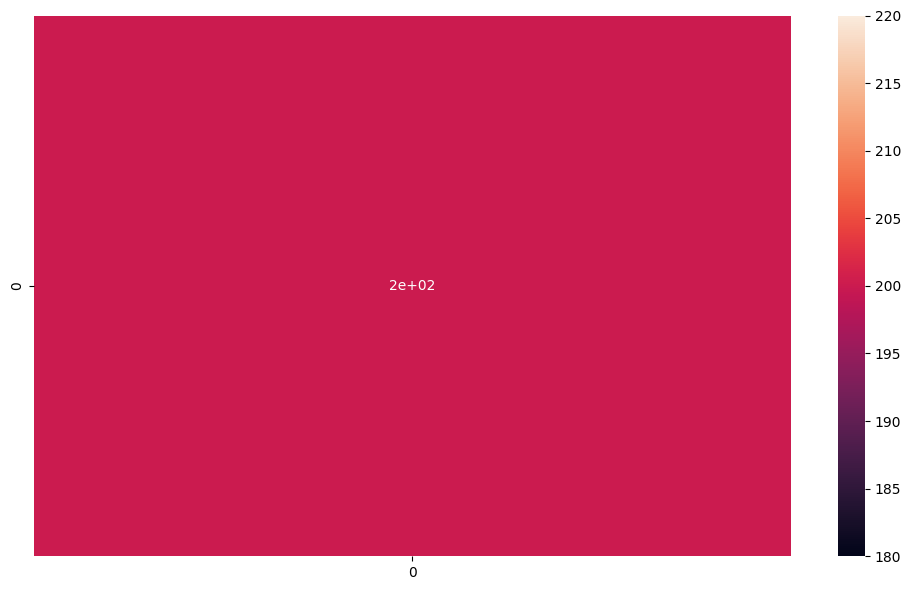

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Hyperparameter Training

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
parameter = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [10, 100, 150, 200],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ["auto", "sqrt", "log2"]
}

In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
clf = GridSearchCV(ranForest, parameter, scoring = "accuracy", n_jobs=2, cv=kfold)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')>

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [ ]:
clf.score(X_test, y_test)

1.0

## Save Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)

## Resources

https://www.youtube.com/watch?v=ollO4RAtkGc